# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

dataset being used: https://www.kaggle.com/kumarajarshi/life-expectancy-who

#Load data

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/portfolio/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.shape

(2938, 22)

#Preliminary look and data cleansing

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#filtering data containing year 2008-20015 (7 years)
data=data[data['Year']>2007]

In [ ]:
data.shape

(1474, 22)

In [ ]:
#replacing the space in column name
data.columns=data.columns.str.replace(' ', '_')
data.head()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1474 non-null   object 
 1   Year                             1474 non-null   int64  
 2   Status                           1474 non-null   object 
 3   Life_expectancy_                 1464 non-null   float64
 4   Adult_Mortality                  1464 non-null   float64
 5   infant_deaths                    1474 non-null   int64  
 6   Alcohol                          1289 non-null   float64
 7   percentage_expenditure           1474 non-null   float64
 8   Hepatitis_B                      1366 non-null   float64
 9   Measles_                         1474 non-null   int64  
 10  _BMI_                            1456 non-null   float64
 11  under-five_deaths_               1474 non-null   int64  
 12  Polio               

Observation:

1. Data contains 22 columns and 1474 rows
2. some columns have missing values except for `country`, `year`, `status`, `infant death`, `expenditure`, `measles`, `under five deaths`, and `HIV/AIDS`
3. All dtypes seem OK (appropriate), given the corresponding column name

Missing values handling

In [ ]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy_                    10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            185
percentage_expenditure               0
Hepatitis_B                        108
Measles_                             0
_BMI_                               18
under-five_deaths_                   0
Polio                                3
Total_expenditure                  199
Diphtheria_                          3
_HIV/AIDS                            0
GDP                                227
Population                         332
_thinness__1-19_years               18
_thinness_5-9_years                 18
Income_composition_of_resources     87
Schooling                           83
dtype: int64

In [ ]:
#drop missing value
data = data.dropna()

In [ ]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy_                   0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles_                           0
_BMI_                              0
under-five_deaths_                 0
Polio                              0
Total_expenditure                  0
Diphtheria_                        0
_HIV/AIDS                          0
GDP                                0
Population                         0
_thinness__1-19_years              0
_thinness_5-9_years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

missing values are succesfully handled

duplicate values handling

In [ ]:
#number of duplicated values
data.duplicated().sum()

0

no duplicates found

#Data understanding

# Data correlation coefficient table

In [ ]:
#table to show correlation
data.corr()

,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.081238,-0.073349,-0.023741,-0.138749,0.009841,-0.006495,-0.023717,0.065241,-0.027512,-0.018710,0.038792,0.022370,-0.132910,0.031402,0.060016,-0.033957,-0.024785,0.097648,0.101688
Life_expectancy_,0.081238,1.000000,-0.729641,-0.185787,0.438925,0.435877,0.219747,-0.079583,0.570812,-0.209561,0.360155,0.215195,0.363119,-0.563149,0.470960,-0.020795,-0.463439,-0.447942,0.843709,0.767616
Adult_Mortality,-0.073349,-0.729641,1.000000,0.080273,-0.212016,-0.269279,-0.167695,0.062220,-0.407725,0.102441,-0.263594,-0.121952,-0.247983,0.539405,-0.291392,0.010283,0.301992,0.290006,-0.577457,-0.506719
infant_deaths,-0.023741,-0.185787,0.080273,1.000000,-0.080239,-0.096373,-0.198532,0.496758,-0.227338,0.996464,-0.158486,-0.154085,-0.168201,0.028336,-0.101894,0.449116,0.476710,0.465137,-0.175621,-0.212232
Alcohol,-0.138749,0.438925,-0.212016,-0.080239,1.000000,0.411381,0.103291,-0.017917,0.345125,-0.075896,0.234825,0.243955,0.209540,-0.065862,0.439085,-0.021949,-0.405604,-0.399893,0.592926,0.601499
percentage_expenditure,0.009841,0.435877,-0.269279,-0.096373,0.411381,1.000000,0.025276,-0.062008,0.259089,-0.098107,0.140300,0.230769,0.139505,-0.114962,0.952931,-0.027522,-0.267833,-0.267875,0.448289,0.437476
Hepatitis_B,-0.006495,0.219747,-0.167695,-0.198532,0.103291,0.025276,1.000000,-0.051123,0.122560,-0.211547,0.549424,0.115344,0.761954,-0.126546,0.041851,-0.037603,-0.129486,-0.120546,0.197286,0.231904
Measles_,-0.023717,-0.079583,0.062220,0.496758,-0.017917,-0.062008,-0.051123,1.000000,-0.135872,0.482580,-0.033722,-0.109741,-0.040219,0.046060,-0.056292,0.340655,0.192387,0.194476,-0.067250,-0.082953
_BMI_,0.065241,0.570812,-0.407725,-0.227338,0.345125,0.259089,0.122560,-0.135872,1.000000,-0.234531,0.198151,0.183790,0.187584,-0.256448,0.283511,-0.071519,-0.543892,-0.549926,0.591689,0.557777
under-five_deaths_,-0.027512,-0.209561,0.102441,0.996464,-0.075896,-0.098107,-0.211547,0.482580,-0.234531,1.000000,-0.175296,-0.155092,-0.186600,0.043213,-0.104764,0.427089,0.473202,0.460400,-0.192547,-0.226692


In [ ]:
#creating new data containing variables that have moderate to strong correlation with life expectancy 
modified_data = data.drop(columns=['Year','infant_deaths','percentage_expenditure','Hepatitis_B','Measles_','under-five_deaths_','Total_expenditure','Total_expenditure','Population','Polio','Alcohol','Diphtheria_'])

In [ ]:
#modify column names
modified_data = modified_data.rename(columns = {'_thinness__1-19_years' : 'underweight 10-19 y.o','_thinness_5-9_years': 'underweight 5-9 y.o'})

#Modified data

In [ ]:
modified_data.head()

,Country,Status,Life_expectancy_,Adult_Mortality,_BMI_,_HIV/AIDS,GDP,underweight 10-19 y.o,underweight 5-9 y.o,Income_composition_of_resources,Schooling
0,Afghanistan,Developing,65.0,263.0,19.1,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,18.6,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,18.1,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,17.6,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,17.2,0.1,63.537231,18.2,18.2,0.454,9.5


#Boxplot to detect outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """
/usr/local/lib/python3.7/dist-

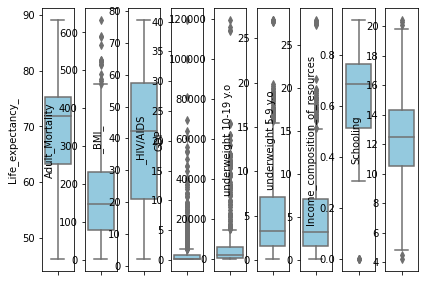

In [ ]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=modified_data[features[i]], color='skyblue')
    plt.tight_layout()

In [ ]:
Q1 = modified_data.quantile(0.25)
Q3 = modified_data.quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3+1.5*IQR
print(IQR)

Life_expectancy_                     12.10000
Adult_Mortality                     155.00000
_BMI_                                36.40000
_HIV/AIDS                             0.70000
GDP                                5771.36912
underweight 10-19 y.o                 5.50000
underweight 5-9 y.o                   5.50000
Income_composition_of_resources       0.25100
Schooling                             3.80000
dtype: float64


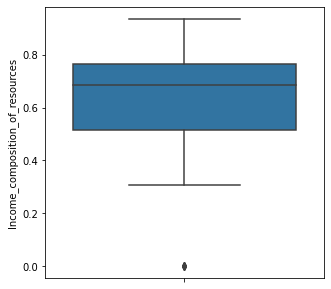

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Income_composition_of_resources',data=modified_data)

In [ ]:
modified_data[modified_data['Income_composition_of_resources']<0.2][['Country','Income_composition_of_resources']]

,Country,Income_composition_of_resources
293,Bhutan,0.0
294,Bhutan,0.0
295,Bhutan,0.0
2702,Turkmenistan,0.0
2703,Turkmenistan,0.0
2704,Turkmenistan,0.0


decide to delete the rows since its impossible to completely not using resources at all

In [ ]:
modified_data=modified_data.drop(modified_data[modified_data.Income_composition_of_resources<0.2].index)

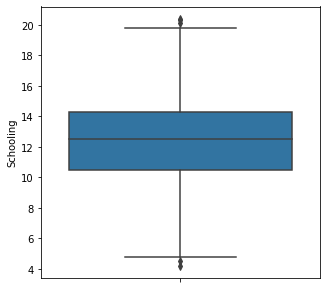

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Schooling',data=modified_data)

decide to not delete since the outliers still acceptable

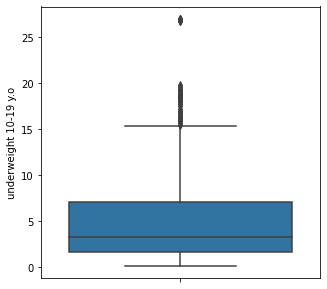

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='underweight 10-19 y.o',data=modified_data)

In [ ]:
modified_data[modified_data['underweight 10-19 y.o']>20][['Country','underweight 10-19 y.o']]

,Country,underweight 10-19 y.o
1187,India,26.8
1188,India,26.8
1189,India,26.9
1190,India,26.9
1191,India,27.0
1192,India,27.0
1193,India,27.0


decide to keep it since it doesnt seem like outliers, just the country having high rate of underweight citizens

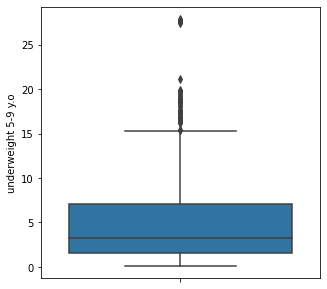

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='underweight 5-9 y.o',data=modified_data)

In [ ]:
modified_data[modified_data['underweight 5-9 y.o']>20][['Country','underweight 5-9 y.o']]

,Country,underweight 5-9 y.o
1187,India,27.4
1188,India,27.5
1189,India,27.6
1190,India,27.7
1191,India,27.8
1192,India,27.8
1193,India,27.9
1949,Pakistan,21.1


similar case, decide to keep it since it just shows how the country has extreme number of case compared to other nations 

#Heatmap to show correlation

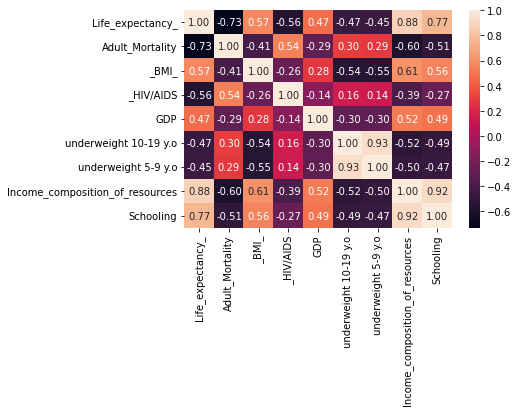

In [ ]:
#heatmap to show correlation
#treshold (>=0.8)
correlation = modified_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:

1. `underweight 10-19` y.o' and `underweight 5-9 y.o` column have the highest correlation which is 0.93
2. `Life_expectancy_` and `Income_composition_of_resources`are highly correlated (0.88)
3. `Income_composition_of_resources` and `Schooling` are also highly correlated (0.92)

in this project,  `Income_composition_of_resources` column is chosen as the representatives since its the most highly correlated to the target variables compared to the other predicting factors 

#Statistical summary

In [ ]:
# group column names based on type
categoricals = ['Country','Status']

numericals = ['Life_expectancy_','Adult_Mortality','_BMI_',	'_HIV/AIDS','GDP','underweight 10-19 y.o','underweight 5-9 y.o','Income_composition_of_resources','Schooling']

In [ ]:
# numerical statistical sumary
modified_data[numericals].describe()

,Life_expectancy_,Adult_Mortality,_BMI_,_HIV/AIDS,GDP,underweight 10-19 y.o,underweight 5-9 y.o,Income_composition_of_resources,Schooling
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,69.694737,165.650616,38.400896,1.370101,6585.160801,4.852184,4.877156,0.653564,12.326764
std,8.740667,115.071809,20.560238,3.432852,13089.735951,4.495652,4.536970,0.154249,2.795823
min,46.200000,1.000000,2.000000,0.100000,5.668726,0.100000,0.100000,0.307000,4.200000
25%,63.200000,77.000000,21.100000,0.100000,566.513873,1.600000,1.600000,0.515000,10.500000
50%,72.000000,147.000000,42.400000,0.100000,1953.976700,3.300000,3.300000,0.688000,12.500000
75%,75.300000,232.000000,57.500000,0.800000,6337.882993,7.100000,7.100000,0.766000,14.300000
max,89.000000,632.000000,77.100000,40.200000,119172.741800,27.000000,27.900000,0.936000,20.400000


1. Mean ~ Median (50%) in `Life_expectancy_`,`_BMI_`,`_HIV/AIDS`,`underweight 10-19 y.o`,`underweight 5-9 y.o`,`Income_composition_of_resources`, `Schooling` columns, indicating somewhat a symmetrical distribution
2. Mean >> 50% (Median) in `Adult_Mortality` and `GDP` columns, indicating they are positively skewed distribution

In [ ]:
# describe method on categorical data
modified_data[categoricals].describe()

,Country,Status
count,893,893
unique,132,2
top,Afghanistan,Developing
freq,8,768


In [ ]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Country column
Afghanistan          8
Albania              8
Greece               7
Spain                7
Botswana             7
                    ..
Sweden               4
Eritrea              4
Netherlands          4
Haiti                2
Equatorial Guinea    1
Name: Country, Length: 132, dtype: int64 

Value counts of Status column
Developing    774
Developed     125
Name: Status, dtype: int64 



Finding:

based on the data, it seems like most of the information was obtained from developing countries

#Top 10 countries with high life expectancy in age

In [ ]:
Life_expectancy = modified_data.sort_values(by = 'Life_expectancy_', ascending = False)
Life_expectancy.head(10)

,Country,Status,Life_expectancy_,Adult_Mortality,_BMI_,_HIV/AIDS,GDP,underweight 10-19 y.o,underweight 5-9 y.o,Income_composition_of_resources,Schooling
937,France,Developing,89.0,88.0,59.1,0.1,45413.65710,0.6,0.6,0.877,16.1
995,Germany,Developed,89.0,69.0,61.9,0.1,4792.65288,1.1,1.1,0.920,17.0
2056,Portugal,Developed,89.0,78.0,6.9,0.1,2277.53613,0.7,0.5,0.837,16.8
241,Belgium,Developed,89.0,76.0,63.4,0.1,47439.39684,1.0,1.0,0.890,16.3
1027,Greece,Developing,88.0,73.0,66.0,0.1,21673.78170,0.8,0.7,0.862,17.2
131,Austria,Developed,88.0,7.0,56.1,0.1,48333.57273,1.8,2.0,0.884,15.7
1542,Luxembourg,Developed,88.0,72.0,59.6,0.1,115761.57700,0.9,0.9,0.894,13.9
132,Austria,Developed,88.0,73.0,55.7,0.1,51126.74139,1.7,2.0,0.880,15.7
1638,Malta,Developed,87.0,59.0,68.0,0.1,22821.84700,0.8,0.7,0.826,14.8
242,Belgium,Developed,87.0,77.0,63.0,0.1,4651.38647,1.0,0.9,0.889,16.3


In [ ]:
Top_10_countries = Life_expectancy[['Country','Life_expectancy_']]
Top_10_countries.head(10)

,Country,Life_expectancy_
937,France,89.0
995,Germany,89.0
2056,Portugal,89.0
241,Belgium,89.0
1027,Greece,88.0
131,Austria,88.0
1542,Luxembourg,88.0
132,Austria,88.0
1638,Malta,87.0
242,Belgium,87.0


Findings:

* Most countries with high life expectancy come from developed countries except France and Greece
* citizenz in the top 10 countries can live up to 87 years old and above
* as shown from the table and , these top 10 performing countries are able to utilize around 80% or more of their resources, which mean adding to what heatmap result already shown, it could be said that income composition have major impact on life expectancy

#HIV/AIDS vs life expectancy

In [ ]:
Developing_countries = modified_data[modified_data['Status'] == "Developing"]
Developed_countries = modified_data[modified_data['Status'] == "Developed"]

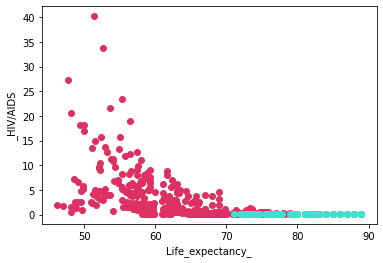

In [ ]:
plt.scatter('Life_expectancy_', '_HIV/AIDS', data = Developing_countries, color = '#DE3163')
plt.scatter('Life_expectancy_', '_HIV/AIDS', data = Developed_countries, color = '#40E0D0')
plt.xlabel('Life_expectancy_')
plt.ylabel('_HIV/AIDS')
plt.show()

#GDP vs life expectancy

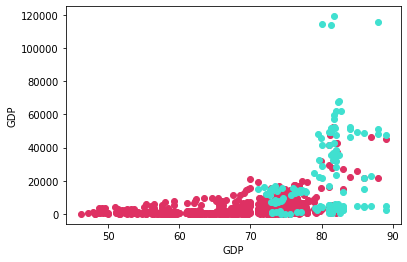

In [ ]:
plt.scatter('Life_expectancy_', 'GDP', data = Developing_countries, color = '#DE3163')
plt.scatter('Life_expectancy_', 'GDP', data = Developed_countries, color = '#40E0D0')
plt.xlabel('GDP')
plt.ylabel('GDP')
plt.show()

#Income_composition_of_resources vs life expectancy

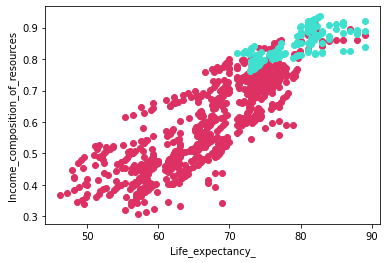

In [ ]:
plt.scatter('Life_expectancy_', 'Income_composition_of_resources', data = Developing_countries, color = '#DE3163')
plt.scatter('Life_expectancy_', 'Income_composition_of_resources', data = Developed_countries, color = '#40E0D0')
plt.xlabel('Life_expectancy_')
plt.ylabel('Income_composition_of_resources')
plt.show()

#schooling vs life expectancy

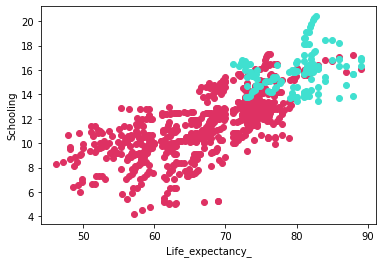

In [ ]:
plt.scatter('Life_expectancy_', 'Schooling', data = Developing_countries, color = '#DE3163')
plt.scatter('Life_expectancy_', 'Schooling', data = Developed_countries, color = '#40E0D0')
plt.xlabel('Life_expectancy_')
plt.ylabel('Schooling')
plt.show()

#Modelling

# Simple Supervised Regression

splitting the data into 75:25 ratio
* using only numerical data

In [ ]:
#'Schooling','underweight 10-19 y.o','underweight 5-9 y.o' are removed to avoid multicollinearity 
y = modified_data[['Life_expectancy_']]
x = modified_data[['Adult_Mortality','_BMI_','_HIV/AIDS','GDP','Income_composition_of_resources']]

In [ ]:
y.shape

(893, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

### StandardScaler

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(x_train)
X_test_scaled = ss.transform(x_test)

###Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test_scaled)

In [ ]:
#evaluating error
from sklearn.metrics import r2_score, mean_squared_error
print('RMSE:', (mean_squared_error(y_test, y_pred,squared=False)))
print('R2:', (mean_squared_error(y_test, y_pred)))
print('MSE:', (mean_squared_error(y_test, y_pred,squared=True)))

RMSE: 2.469510506731474
R2: 6.098482142857143
MSE: 6.098482142857143


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train.values.ravel())
y_pred = rf.predict(X_test_scaled)

print('RMSE:', (mean_squared_error(y_test, y_pred,squared=False)))
print('R2:', (mean_squared_error(y_test, y_pred)))
print('MSE:', (mean_squared_error(y_test, y_pred,squared=True)))

RMSE: 1.6761876080324152
R2: 2.8096048973214294
MSE: 2.8096048973214294


### K-Nearest-Neighbor Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train.values.ravel())
y_pred = knn.predict(X_test_scaled)

print('RMSE:', (mean_squared_error(y_test, y_pred,squared=False)))
print('R2:', (mean_squared_error(y_test, y_pred)))
print('MSE:', (mean_squared_error(y_test, y_pred,squared=True)))

RMSE: 1.8290293093019898
R2: 3.345348214285714
MSE: 3.345348214285714


Overall, Random Forest Regression model yields the highest accuracy as seen from the three metric values 

# Intermediate Supervised Regression

In [ ]:
#'Schooling','underweight 10-19 y.o','underweight 5-9 y.o' are removed to avoid multicollinearity 
y = modified_data[['Life_expectancy_']]
x = modified_data[['Country','Status','Adult_Mortality','_BMI_','_HIV/AIDS','GDP','Income_composition_of_resources']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

### OneHotEncoding for categorical data

In [ ]:
modified_data['Status'] = modified_data['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
x_test

,Country,Status,Adult_Mortality,_BMI_,_HIV/AIDS,GDP,Income_composition_of_resources
2255,Senegal,0,219.0,21.2,0.5,12.566464,0.444
4,Afghanistan,0,275.0,17.2,0.1,63.537231,0.454
324,Bosnia and Herzegovina,0,92.0,53.7,0.1,55.156834,0.711
581,Colombia,0,15.0,54.2,0.1,625.655440,0.695
2285,Seychelles,0,177.0,34.2,0.1,12189.951600,0.744
...,...,...,...,...,...,...,...
278,Benin,0,259.0,22.5,1.6,793.452430,0.448
1383,Kiribati,0,27.0,75.2,0.1,1493.165100,0.584
2651,Trinidad and Tobago,0,172.0,45.0,0.3,1967.832830,0.773
2844,Vanuatu,0,135.0,51.7,0.1,3167.343560,0.591


In [ ]:
cat=['Country']
num = ['Status','Adult_Mortality','_BMI_','_HIV/AIDS','GDP','Income_composition_of_resources']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

cat_transform = OneHotEncoder(handle_unknown = 'ignore', sparse=False)


preprocessor = ColumnTransformer(
    transformers = [
        ("categorical_encoder", cat_transform, cat),
        ("minmax_scaler", StandardScaler(), num)
    ]
)

dt_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor(random_state = 42))]
)

rf_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", RandomForestRegressor(random_state = 42))]
)

kn_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

In [ ]:
def fit_evaluate(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('RMSE:', (mean_squared_error(y_test, y_pred,squared=False)))
    print('R2:', (mean_squared_error(y_test, y_pred)))
    print('MSE:', (mean_squared_error(y_test, y_pred,squared=True)))

In [ ]:
fit_evaluate(dt_reg)

RMSE: 1.8481288800142857
R2: 3.415580357142858
MSE: 3.415580357142858


In [ ]:
fit_evaluate(rf_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RMSE: 1.5248445661420245
R2: 2.325150950892859
MSE: 2.325150950892859


In [ ]:
fit_evaluate(kn_reg)

RMSE: 1.952013612364715
R2: 3.810357142857143
MSE: 3.810357142857143


Findings:
* After incorporating columns containing categoricals data, the data yields the same result as the one without categorical data which is Random Forest Regression model. 
* The values resulted from the metrics are also quite similar, therefore adding categoricals data doesnt give any major impact to the result
* The lower the RMSE, the better a given model is able to “fit” a dataset. As shown from three of the model, random forest regression has the smallest RMSE value which tells us that it’s able to fit the dataset the best out of the three potential models.

# Hyperparamater Tuning

Random forest model will be used since it gives the best result
The result from the one containing categoricals data will be used since the metrics give a slight smaller value 

In [ ]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor(n_jobs = -1, random_state = 6)
rf_random = RandomizedSearchCV(estimator = rf, 
                              param_distributions = random_grid,
                              n_iter = 10,
                              cv = 5,
                              random_state = 6,
                              n_jobs = -1)

rf_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", rf_random)]
)

rf_reg.fit(x_train, y_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Country']),
                                                 ('minmax_scaler',
                                                  StandardScaler(),
                                                  ['Status', 'Adult_Mortality',
                                                   '_BMI_', '_HIV/AIDS', 'GDP',
                                                   'Income_composition_of_resources'])])),
                ('regressor',
                 RandomizedSearchCV(cv=5,
                                    estimator=RandomForestRegressor(n_...
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
      

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 424}

In [ ]:
final_rf = RandomForestRegressor(n_estimators = 424, min_samples_split = 5, min_samples_leaf = 1,
                                max_features = 'sqrt', max_depth = 50, bootstrap = True,
                                n_jobs = -1)

final_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", final_rf)]
)

In [ ]:
final_reg.fit(x_train, y_train.values.ravel())
y_pred = final_reg.predict(x_test)
print('RMSE:', (mean_squared_error(y_test, y_pred,squared=False)))
print('R2:', (mean_squared_error(y_test, y_pred)))
print('MSE:', (mean_squared_error(y_test, y_pred,squared=True)))

RMSE: 1.5734981664093575
R2: 2.47589647969361
MSE: 2.47589647969361


# Feature Importance

In [ ]:
y = modified_data[['Life_expectancy_']]
x = modified_data[['Status','Adult_Mortality','_BMI_','_HIV/AIDS','GDP','Income_composition_of_resources']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(x_train)
X_test_scaled = ss.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.        , 0.13111799, 0.02272367, 0.28430838, 0.01177768,
       0.55007227])

Text(0.5, 0, 'Random Forest Feature Importance')

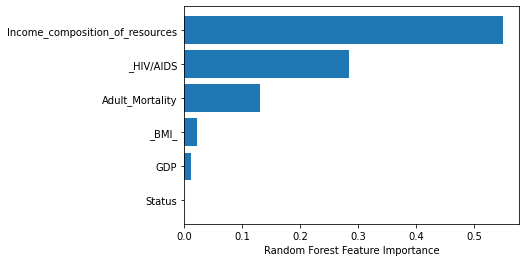

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

as can be seen from the graph abox, income is proven to be the most useful feature to predict the life expectancy rate followed by HIV/AIDS, adult mortality, BMI and last GDP

